In [ ]:
import numpy as np
import seaborn as sns

# Boostrap

## Resampling an array

In [ ]:
array = np.random.randn(20) 
print(array)

[-1.56259292  0.86485459  1.49317365 -0.39770038  0.45126919 -1.07706822
  0.07018862  0.27186075 -0.64078885  0.55767454 -0.03001769  1.11212893
 -0.75505883  0.09731875 -0.70809591  0.60090024  0.31170149  1.10444912
 -1.80000619  0.69579605]


We will create a new array with same size of raw, but now we will use sample with replacement to see how should be our new array.

In [ ]:
len(array)

20

In [ ]:
# Bootstrap sample

np.random.choice(array,size=len(array)) # array with samples from raw array

array([ 0.60090024, -0.64078885,  0.86485459, -0.64078885,  0.07018862,
        0.86485459,  0.60090024,  0.09731875,  1.10444912, -0.64078885,
        0.27186075,  0.27186075,  1.11212893, -1.56259292,  0.31170149,
       -1.56259292, -0.39770038,  0.69579605,  1.10444912, -0.39770038])

In [ ]:
## Bootstrap replicate
"A statistic computed from a resampled array"

np.random.choice(array,size=len(array)).mean()

0.03009484504758994

## Many bootstrap replicates 
With that we should be able to compute confidence intervals

In [ ]:
# Same that CLT - Central Limit Theorem

array_boot = np.empty(10000)

for i in range(10000):

  array_boot[i] = np.random.choice(array,size=len(array)).mean()

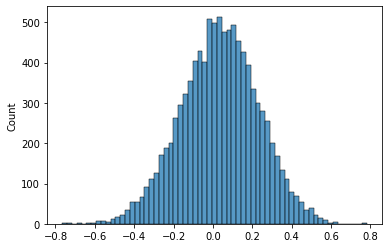

In [ ]:
sns.histplot(array_boot)

In [ ]:
# Confidence Interval 

int = np.percentile(array_boot, [2.5, 97.5])
int

array([-0.36328434,  0.41397789])

# Pairs Bootstrap

Used to make an bootstrap in variables that could not be alone, example: (x,y) - Slope and intercept 

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=size)
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y)

    return bs_slope_reps, bs_intercept_reps

